In [1]:
import tensorflow as tf
import numpy as np
import torch
from torch import nn
from torch.nn import Linear as linear
from torch.nn import ReLU as relu
import os
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
def dataload():
    x=[]
    y=[]
    cars=os.listdir('cars/')
    for i in cars:
        examples=os.listdir('cars/{}/img/'.format(i))
        for j in examples:
            im=np.array(Image.open(r"cars\{}\img\{}".format(i,j)).resize((128, 128)))/255
            if im.shape != (128, 128, 3):
                continue 
            im=(im.reshape((1,128*128*3)).T)
            x.append(im)
            if i=='negative':
                y.append(0)
            else: 
                y.append(1)  
    return x,y

In [3]:
x,y=dataload()

In [4]:
x = np.array(x)
y = np.array(y) 
print(x.shape,y.shape)

(1063, 49152, 1) (1063,)


<function matplotlib.pyplot.show(close=None, block=None)>

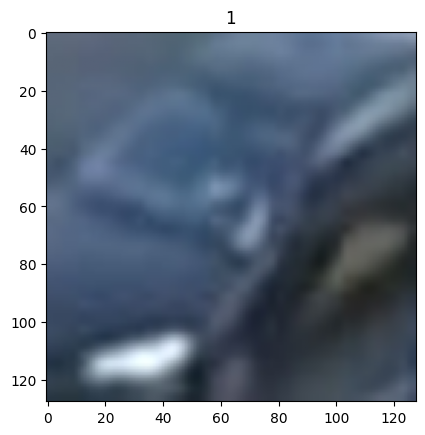

In [5]:
t=450
plt.imshow(x[t].reshape((128,128,3)))
plt.title(y[t])
plt.show

In [6]:
x=np.transpose(x,(0,2,1))
x.shape

(1063, 1, 49152)

In [7]:
model=nn.Sequential(
linear(49152,2024),nn.Dropout(p=0.4),
relu(),
linear(2024,1024),nn.Dropout(p=0.4),
relu(),
linear(1024,512),nn.Dropout(p=0.4),
relu(),
linear(512,256),nn.Dropout(p=0.4),
relu(),
linear(256,128),nn.Dropout(p=0.2),
relu(),
linear(128,1),
nn.Sigmoid())
loss_fn=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001,betas=(0.9, 0.999), weight_decay=1e-5)
if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device(dev)
model=model.to(device)

In [8]:
print(model)

Sequential(
  (0): Linear(in_features=49152, out_features=2024, bias=True)
  (1): Dropout(p=0.4, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=2024, out_features=1024, bias=True)
  (4): Dropout(p=0.4, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=512, bias=True)
  (7): Dropout(p=0.4, inplace=False)
  (8): ReLU()
  (9): Linear(in_features=512, out_features=256, bias=True)
  (10): Dropout(p=0.4, inplace=False)
  (11): ReLU()
  (12): Linear(in_features=256, out_features=128, bias=True)
  (13): Dropout(p=0.2, inplace=False)
  (14): ReLU()
  (15): Linear(in_features=128, out_features=1, bias=True)
  (16): Sigmoid()
)


In [9]:
# dummy_outputs = torch.rand(4)
# dummy_labels = torch.tensor([1., 1., 0., 0.])
# loss = loss_fn(dummy_outputs, dummy_labels)
# print('Total loss for this batch: {}'.format(loss.item()))

In [10]:
randomize = np.arange(len(x),dtype='int32')
np.random.shuffle(randomize)
x = x[randomize]
y = y[randomize]
print(x.shape)
print(y.shape)

(1063, 1, 49152)
(1063,)


In [11]:
x_train=x[0:800]
y_train=y[0:800]
print(x_train.shape,y_train.shape)

(800, 1, 49152) (800,)


In [12]:
x_test=x[800:]
y_test=y[800:]
print(x_test.shape,y_test.shape)

(263, 1, 49152) (263,)


In [13]:
def accuracy():
    with torch.no_grad():
        y_pred = model(x_test_t)
    accuracy_test = (y_pred.round() == y_test_t).float().mean()
    with torch.no_grad():
        y_pred = model(x_train_t)
    accuracy_train = (y_pred.round() == y_train_t).float().mean()
    print(f"Accuracy of test set {accuracy_test}\nAccuracy of train set {accuracy_train}")

In [14]:
def train(n_epochs,x,y,batch_size):
    for epoch in range(n_epochs):
        for i in range(0, len(x), batch_size):
            Xbatch = x[i:i+batch_size]
            # if torch.cuda.is_available(): 
            #     dev = "cuda:0" 
            # else: 
            #     dev = "cpu" 
            # device = torch.device(dev)
            # Xbatch=Xbatch.to(device)
            y_pred = model(Xbatch)
            ybatch = y[i:i+batch_size]
            
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("#############################################")
        print(f'Finished epoch {epoch}, latest loss {loss}')
        accuracy()

In [15]:
x_train_t = torch.tensor(x_train, dtype=torch.float32).reshape((x_train.shape[0],49152))
y_train_t = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
x_test_t = torch.tensor(x_test, dtype=torch.float32).reshape((x_test.shape[0],49152))
y_test_t = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device(dev)
x_train_t= x_train_t.to(device)
y_train_t= y_train_t.to(device)
x_test_t = x_test_t.to(device) 
y_test_t = y_test_t.to(device) 
torch.cuda.is_available()

True

In [16]:
train(60,x_train_t,y_train_t,32)

#############################################
Finished epoch 0, latest loss 0.8259257078170776
Accuracy of test set 0.6539924144744873
Accuracy of train set 0.59375
#############################################
Finished epoch 1, latest loss 0.7315040826797485
Accuracy of test set 0.6539924144744873
Accuracy of train set 0.6549999713897705
#############################################
Finished epoch 2, latest loss 0.6175333261489868
Accuracy of test set 0.8098859190940857
Accuracy of train set 0.7912499904632568
#############################################
Finished epoch 3, latest loss 0.43963736295700073
Accuracy of test set 0.8479087352752686
Accuracy of train set 0.8312499523162842
#############################################
Finished epoch 4, latest loss 0.5032098889350891
Accuracy of test set 0.8593155741691589
Accuracy of train set 0.8062499761581421
#############################################
Finished epoch 5, latest loss 0.3724612593650818
Accuracy of test set 0.836501896381

In [17]:
accuracy()
print(x_test_t,x_test)

Accuracy of test set 0.9011406898498535
Accuracy of train set 0.9112499952316284
tensor([[0.2745, 0.2667, 0.3098,  ..., 0.1412, 0.1451, 0.2157],
        [0.0627, 0.0784, 0.0902,  ..., 0.2078, 0.2275, 0.3020],
        [0.8549, 0.9451, 0.9725,  ..., 0.6941, 0.6431, 0.5804],
        ...,
        [0.0235, 0.0078, 0.1451,  ..., 0.0941, 0.2980, 0.0431],
        [0.8039, 0.8157, 0.8510,  ..., 0.6314, 0.6235, 0.6392],
        [0.8039, 0.7882, 0.7412,  ..., 0.9412, 0.9804, 0.9882]],
       device='cuda:0') [[[0.2745098  0.26666667 0.30980392 ... 0.14117647 0.14509804 0.21568627]]

 [[0.0627451  0.07843137 0.09019608 ... 0.20784314 0.22745098 0.30196078]]

 [[0.85490196 0.94509804 0.97254902 ... 0.69411765 0.64313725 0.58039216]]

 ...

 [[0.02352941 0.00784314 0.14509804 ... 0.09411765 0.29803922 0.04313725]]

 [[0.80392157 0.81568627 0.85098039 ... 0.63137255 0.62352941 0.63921569]]

 [[0.80392157 0.78823529 0.74117647 ... 0.94117647 0.98039216 0.98823529]]]


In [18]:
with torch.no_grad():
    y_pred=model(x_test_t)
# for i in range (len(x_test)):
#     if y_pred[i].round()!=y_test_t[i]:
        # print(i)
        # plt.imshow(x_test[i].reshape((128,128,3)))
        # plt.figure()
        # plt.title(y_pred[i].round())
        # plt.show


In [19]:
def test_pic():
    im=np.array(Image.open(r"Test_pictures\t1.jpeg").resize((128, 128)))/255
    x=np.array(im)
    x=x.reshape(-1,1).T
    x_t=torch.tensor(x,dtype=torch.float32).to(device)
    with torch.no_grad():
        y_pred=model(x_t)
    if y_pred>0.2:
        print("It is a car",y_pred)
    else:
        print("Not a car",y_pred)
    plt.imshow(im.reshape((128,128,3)))
    plt.title(y_pred>0.5)
    plt.show

Not a car tensor([[0.0234]], device='cuda:0')


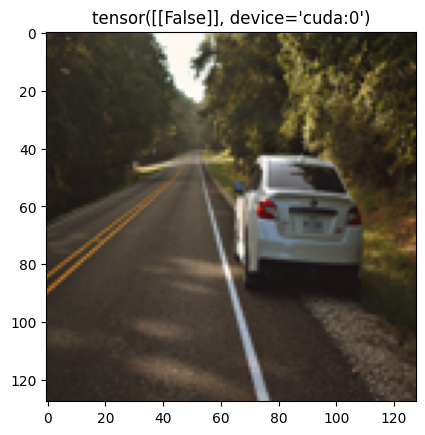

In [20]:
test_pic()

In [21]:
torch.cuda.is_available()

True

In [22]:
# x_train_t.is_cuda
torch.cuda.device_count()
torch.cuda.get_device_name(0)


'NVIDIA GeForce RTX 3060 Laptop GPU'

In [23]:
np.

SyntaxError: invalid syntax (2469254449.py, line 1)